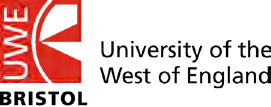

# Comparative Analysis the Predictability of stock price forecasting using ARIMA and LSTM

The purpose of this final report aims to evaluate the predictability for the stock price of Power Asset (HKG:6) between using ARIMA and LSTM.

Information Technology Project (UFCFFC-30-3)

Final Project Analysis Result and Program Coding

Author by Wong Hau Hang, Tony

Student ID : 17047332 (UWE) / 177212602 (SHAPE)

Module Leader :	Wu Sui Lun, Richard

Project Supervisor :	Shum Lok Cheung, Jesse

In [90]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pylab as plt 
import seaborn as sns # for visualization
from statsmodels.tsa.stattools import adfuller #for the dickey-fuller test necessary for the ARIMA model
from statsmodels.tsa.stattools import acf, pacf # for the ACF and PACF
from statsmodels.tsa.arima_model import ARIMA # for ARIMA 

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Regressors stuff
import sklearn
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestRegressor

#read the file
df = pd.read_csv('6HK.csv')

#print the head
df.head()

import warnings
warnings.filterwarnings('ignore')

# Power Assets Historial Stock Price

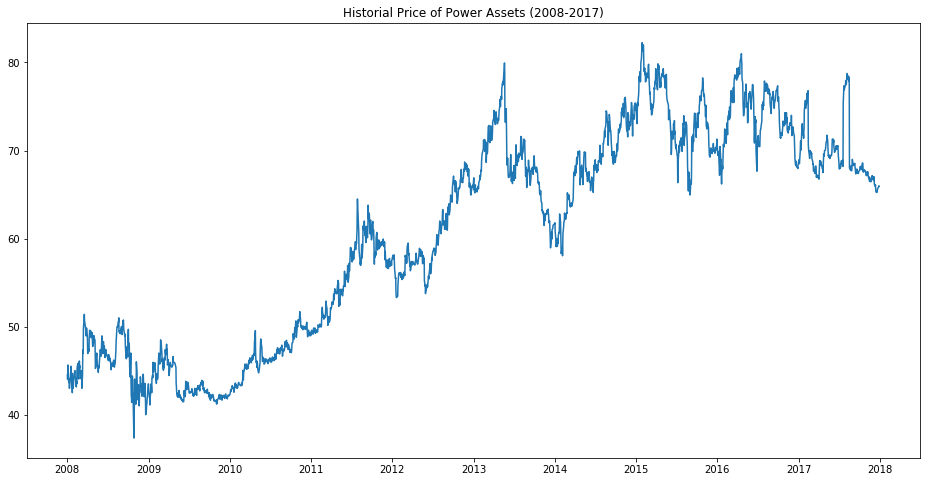

In [91]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%d/%m/%Y')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.title('Historial Price of Power Assets (2008-2017)')
plt.plot(df['Close'], label='Close Price history')

In [92]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [93]:
#splitting into train and validation
#1720 = no. of total records between 2007 - 2014
train = new_data[:1720]
valid = new_data[1720:]

In [95]:
new_data.shape, train.shape, valid.shape
((2457, 2), (1720, 2), (737, 2))

((2457, 2), (1720, 2), (737, 2))

In [96]:
train['Date'].min(), train['Date'].max(), valid['Date'].min(), valid['Date'].max()

(Timestamp('2008-01-02 00:00:00'),
 Timestamp('2014-12-31 00:00:00'),
 Timestamp('2015-01-02 00:00:00'),
 Timestamp('2017-12-29 00:00:00'))

In [97]:
#make predictions
preds = []
for i in range(0,737):
    a = train['Close'][len(train)-737+i:].sum() + sum(preds)
    b = a/737
    preds.append(b)

In [98]:
#setting index as date values
df['Date'] = pd.to_datetime(df.Date,format='%d/%m/%Y')
df.index = df['Date']

#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [99]:
#create features
from fastai.structured import  add_datepart
add_datepart(new_data, 'Date')
new_data.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp

# ARIMA Model

In [105]:
# Take around 9 mins for model prediction
from pyramid.arima import auto_arima

data = df.sort_index(ascending=True, axis=0)

train = data[:1720]
valid = data[1720:]

training = train['Close']
validation = valid['Close']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=737)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=3809.670, BIC=3836.882, Fit time=14.745 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=4886.981, BIC=4897.866, Fit time=0.320 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=4423.433, BIC=4445.203, Fit time=3.007 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=3805.011, BIC=3826.781, Fit time=20.109 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=3806.106, BIC=3833.318, Fit time=18.768 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=4880.061, BIC=4896.389, Fit time=0.536 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=3806.093, BIC=3833.306, Fit time=34.384 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=3809.011, BIC=3841.666, Fit time=22.901 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=3810.395, BIC=3826.722, Fit time=8.229 seconds
Fit ARIMA: order=(0, 1,

# ARIMA Result

In [118]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))
rms

18.116969255240395

Text(0.5, 1.0, 'Correlation between actual values and predicted values using ARIMA')

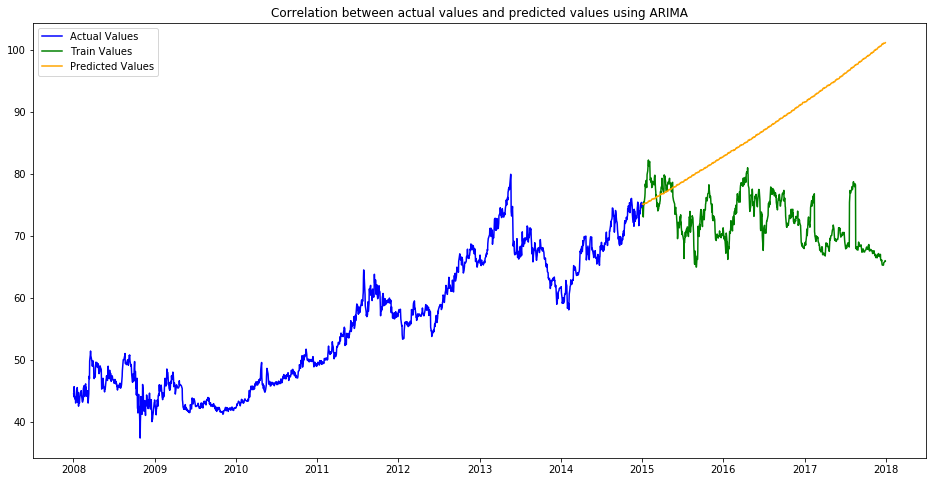

In [114]:
#for plotting
train = new_data[:1720]
valid = new_data[1720:]
valid['Predictions'] = closing_price
plt.figure(figsize=(16,8))
arimatr = plt.plot(train['Close'], color='blue', label='Actual Values')
arimate = plt.plot(valid['Close'], color='green', label='Train Values')
arimapr = plt.plot(forecast['Prediction'], color='orange', label='Predicted Values')
plt.legend(loc='best')
plt.title('Correlation between actual values and predicted values using ARIMA')

# LSTM Model

In [108]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:1720,:]
valid = dataset[1720:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

Using TensorFlow backend.


Epoch 1/1
 - 189s - loss: 0.0024


# LSTM Result

In [109]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

1.8096525079647041

Text(0.5, 1.0, 'Correlation between actual values and predicted values using LSTM')

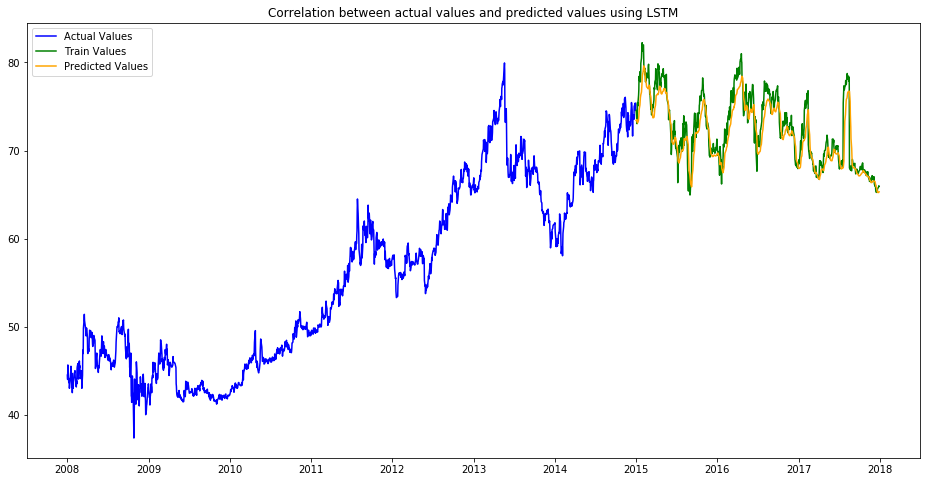

In [110]:
#for plotting
train = new_data[:1720]
valid = new_data[1720:]
valid['Predictions'] = closing_price
plt.figure(figsize=(16,8))
auval = plt.plot(train['Close'], color='blue', label='Actual Values')
taval = plt.plot(valid['Close'], color='green', label='Train Values')
pdval = plt.plot(valid['Predictions'], color='orange', label='Predicted Values')
plt.legend(loc='best')
plt.title('Correlation between actual values and predicted values using LSTM')

# Compare the results with ARIMA and LSTM 

Text(0.5, 1.0, 'Correlation between actual values and predicted values using ARIMA and LSTM')

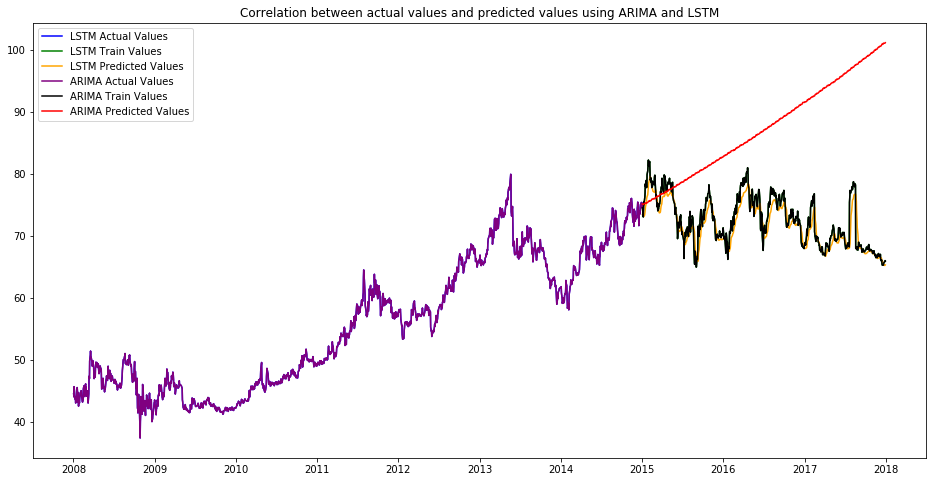

In [116]:
#for plotting
train = new_data[:1720]
valid = new_data[1720:]
valid['Predictions'] = closing_price
plt.figure(figsize=(16,8))
auval = plt.plot(train['Close'], color='blue', label='LSTM Actual Values')
taval = plt.plot(valid['Close'], color='green', label='LSTM Train Values')
pdval = plt.plot(valid['Predictions'], color='orange', label='LSTM Predicted Values')
arimatr = plt.plot(train['Close'], color='purple', label='ARIMA Actual Values')
arimate = plt.plot(valid['Close'], color='black', label='ARIMA Train Values')
arimapr = plt.plot(forecast['Prediction'], color='red', label='ARIMA Predicted Values')
plt.legend(loc='best') 
plt.title('Correlation between actual values and predicted values using ARIMA and LSTM')